In [1]:
import os
import sys
import numpy as np
import json
import matplotlib.pyplot as plt
import mdtraj
import urllib.request
import yaml

sys.path.insert(1, '../BuildDatabank/')
from databankLibrary import download_link, lipids_dict, molecule_numbers_dict
    
class databank():
    
    def __init__(self,path=r'../../Data/Simulations/'):
        self.path = path
        self.systems = []
        self.__load_systems__(path)

    def __load_systems__(self,path):
        for subdir, dirs, files in os.walk(path):
            for filename in files:
                filepath = os.path.join(subdir, filename)
                #print(filepath)
                if filename == "README.yaml":
                    with open(filepath) as yaml_file:
                        content = yaml.load(yaml_file, Loader=yaml.FullLoader)
                        content['path'] = filepath
                        self.systems.append(content)
                
    def get_systems(self):
        return self.systems
    
    def pie_temperature(self):
        list_feature = [ int(float(system['TEMPERATURE'])) for system in self.systems]
        import collections
        counter = collections.Counter(list_feature)
        plt.pie(counter.values(),labels=counter.keys(), normalize=True)


In [22]:
path = '../../Data/Simulations/'
db_data = databank(path)
systems = db_data.get_systems()

Number of entries:  175
Total size of trajectories:  470.2028169045225 Gb
Total time of trajectories:  62949.22000000001 ns


Text(0, 0.5, 'Distribution')

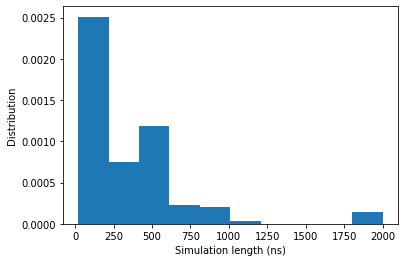

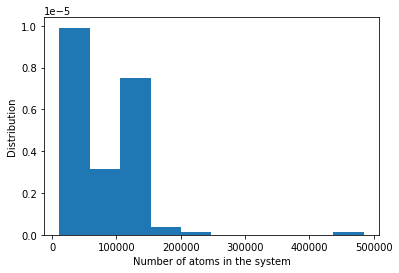

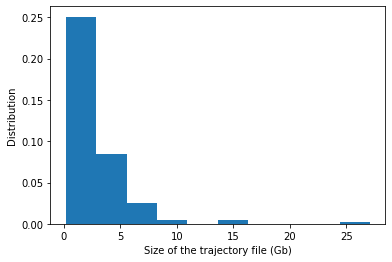

In [24]:
SimulationLengths = []
NumberOfAtoms = []
SizeOfTrajectories = []

for system in systems:
    SimulationLengths.append(system['TRJLENGTH']*0.001)
    NumberOfAtoms.append(system['NUMBER_OF_ATOMS'])
    SizeOfTrajectories.append(system['TRAJECTORY_SIZE']/(1024*1024*1024))
    
print("Number of entries: ",len(systems))
print("Total size of trajectories: ",str(np.sum(SizeOfTrajectories)) + ' Gb')
print("Total time of trajectories: ",str(np.sum(SimulationLengths)) + ' ns')

distSIMl = plt.hist(SimulationLengths, density=True)
plt.xlabel('Simulation length (ns)')
plt.ylabel('Distribution')
plt.figure()
distNatoms = plt.hist(NumberOfAtoms, density=True)
plt.xlabel('Number of atoms in the system')
plt.ylabel('Distribution')
plt.figure()
disttrjSIZE = plt.hist(SizeOfTrajectories, density=True)
plt.xlabel('Size of the trajectory file (Gb)')
plt.ylabel('Distribution')

In [23]:
ready = 0
notready = 0
for system in systems:
    try:
        tst = system['COMPOSITION'] 
        ready = ready + 1
    except:
        print(system,'\n')
        notready = notready + 1
        
print('ready',ready)
print('notready',notready)

{'DOI': '10.5281/zenodo.3950029', 'SOFTWARE': 'gromacs', 'TRJ': [['dppc_298k.xtc']], 'TPR': [['dppc_298k.tpr']], 'PREEQTIME': 0, 'TIMELEFTOUT': 0, 'DPPC': 'DPPC', 'SOL': 'SOL', 'MAPPING_DICT': {'DPPC': 'mappingDPPCcharmm.txt', 'SOL': 'mappingTIP3Pwater.txt'}, 'DIR_WRK': '/usr/home/bort/Databank', 'PUBLICATION': '10.1039/D0CP02058C', 'AUTHORS_CONTACT': 'Walter, Vivien; Ruscher, Celine; Benzerara, Olivier; Marques, Carlos; Thalmann, Fabrice', 'SYSTEM': '212DPPC_29826SOL_298K', 'SOFTWARE_VERSION': 2016.4, 'FF': 'CHARMM36', 'FF_SOURCE': None, 'FF_DATE': 'June 2015', 'CPT': None, 'LOG': None, 'TOP': None, 'TRAJECTORY_SIZE': 4366026280, 'NPOPC': [0, 0], 'NPOPG': [0, 0], 'NPOPS': [0, 0], 'NPOPE': [0, 0], 'NDMPC': [0, 0], 'NDPPC': [106, 106], 'NDPPE': [0, 0], 'NDPPG': [0, 0], 'NDEPC': [0, 0], 'NDLPC': [0, 0], 'NDLIPC': [0, 0], 'NDOPC': [0, 0], 'NDDOPC': [0, 0], 'NDOPS': [0, 0], 'NDSPC': [0, 0], 'NDAPC': [0, 0], 'NPOPI': [0, 0], 'NSAPI': [0, 0], 'NSLPI': [0, 0], 'NCER': [0, 0], 'NCHOL': [0, 0],

In [41]:
ready = 0
notready = 0
for system in systems:
    try:        
        for molecule in system['COMPOSITION']:
            Nmolecule = np.sum(system['COMPOSITION'][molecule]['COUNT'])
            print(molecule,Nmolecule)
        ready = ready + 1
        print(system['DOI'],len(system['COMPOSITION']))
    except:
        notready = notready + 1
        
print('ready',ready)
print('notready',notready)

POPC 256
SOL 10342
10.5281/zenodo.4537207 2
POPC 80
CHOL 80
SOL 4496
10.5281/zenodo.14068 3
POPC 128
SOL 7290
10.5281/zenodo.4643875 2
POPC 128
SOL 5120
10.5281/zenodo.3474863 2
POPS 128
SOD 128
SOL 4480
10.5281/zenodo.1129415 3
POPC 128
SOL 5120
10.5281/zenodo.4683633 2
POPC 500
SOL 25000
10.5281/zenodo.3247435 2
DMPC 180
POPI 16
SAPI 46
SLPI 14
SOD 104
CLA 28
SOL 12800
10.5281/zenodo.4651415 7
POPC 100
CHOL 24
SOL 4960
10.5281/zenodo.14067 3
ready 9
notready 124


In [25]:
systems = db_data.get_systems()
systems

[{'CAL': 'CA',
  'CHOL': 'CHOL',
  'CLA': 'CLA',
  'DATEOFRUNNING': '12/05/2021',
  'DHMDMAB': 'T7H',
  'DIR_WRK': '/media/osollila/Data/tmp/DATABANK/',
  'DOI': '10.5281/zenodo.1288297',
  'EXPERIMENT': {},
  'FF': 'CHARMM36',
  'FF_DATE': '??',
  'FF_SOURCE': 'NMRlipids IVa',
  'MAPPING_DICT': {'CLA': 'mappingCLA.txt',
   'DHMDMAB': 'mappingDHMDMABcharmm.txt',
   'POPC': 'mappingPOPCcharmm.txt',
   'SOL': 'mappingTIP3PCHARMMgui.txt'},
  'NCAL': 0,
  'NCHOL': [0, 0],
  'NCLA': 30,
  'NDHMDMAB': [15, 15],
  'NDMPC': [0, 0],
  'NDPPC': [0, 0],
  'NPOPC': [50, 50],
  'NPOPE': [0, 0],
  'NPOPG': [0, 0],
  'NPOPI': [0, 0],
  'NPOPS': [0, 0],
  'NPOT': 0,
  'NSAPI': [0, 0],
  'NSLPI': [0, 0],
  'NSOD': 0,
  'NSOL': 7966,
  'NUMBER_OF_ATOMS': 40538,
  'POPC': 'POPC',
  'POPE': 'POPE',
  'POPG': 'POPG',
  'POPS': 'POPS',
  'POT': 'K',
  'PREEQTIME': 0,
  'SOD': 'NA',
  'SOFTWARE': 'gromacs',
  'SOL': 'TIP3',
  'SYSTEM': 'POPC20%DHMDMAB_T313K',
  'TEMPERATURE': '313',
  'TIMELEFTOUT': 20,
  'T

In [207]:
for system in systems:
    for feature in system.items():
        if "PC" in feature[0]:
            if feature[0][0] != 0:
                print(f"{feature} in {system['path']}\n")
    print(system)
    break
        

('POPC', 'POPC') in ../../Data/Simulations/6e5/059/6e50598ebc47c6e57f6d242896be41b8a18de9a6/1c4ab02a568cca02b0eedbdc6c52ea136c2f3c40/README.yaml

('NPOPC', [125, 125]) in ../../Data/Simulations/6e5/059/6e50598ebc47c6e57f6d242896be41b8a18de9a6/1c4ab02a568cca02b0eedbdc6c52ea136c2f3c40/README.yaml

('NDMPC', [0, 0]) in ../../Data/Simulations/6e5/059/6e50598ebc47c6e57f6d242896be41b8a18de9a6/1c4ab02a568cca02b0eedbdc6c52ea136c2f3c40/README.yaml

('NDPPC', [0, 0]) in ../../Data/Simulations/6e5/059/6e50598ebc47c6e57f6d242896be41b8a18de9a6/1c4ab02a568cca02b0eedbdc6c52ea136c2f3c40/README.yaml

{'DOI': '10.5281/zenodo.3483787', 'SOFTWARE': 'gromacs', 'TRJ': [['run.wrapped.xtc']], 'TPR': [['step7_1.tpr']], 'PREEQTIME': 0, 'TIMELEFTOUT': 0, 'POPC': 'POPC', 'POPG': 'POPG', 'SOL': 'TIP3', 'POT': 'POT', 'MAPPING_DICT': {'POPC': 'mappingPOPCcharmm.txt', 'POPG': 'mappingPOPGcharmm.txt', 'SOL': 'mappingTIP3PCHARMMgui.txt', 'POT': 'mappingPOT.txt'}, 'DIR_WRK': '/usr/home/bort/Databank', 'PUBLICATION': Non

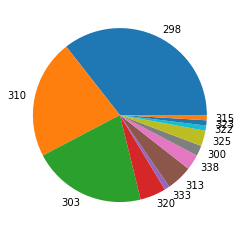

In [202]:
db_data.pie_temperature()

In [97]:
temps = [ int(float(system['TEMPERATURE'])) for system in systems]

TypeError: 'databank' object is not iterable

In [ ]:
import collections
counter = collections.Counter(temps)
plt.pie(counter.values(),labels=counter.keys());

In [ ]:

lipids = [PC,PG, PS, PE, PI]
